In [ ]:
Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.
Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)
Переменная, которую надо предсказать - ’MEDV’.
Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])
Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Проверяем данные на пропуски ####

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Пропусков нет, можно далее работать с датасетом

#### Проверим основные характеристики и посмотрим нет ли выбросов ####

In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM'>

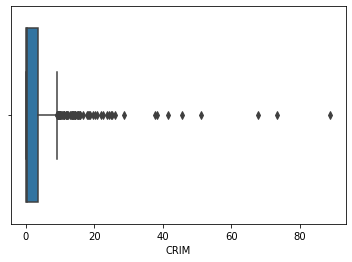

In [11]:
sns.boxplot(data['CRIM'])

Похоже на выбросы, но вполне возможно, что в некоторых районах действительно крайне криминальная обстановка, поэтому оставляем.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ZN'>

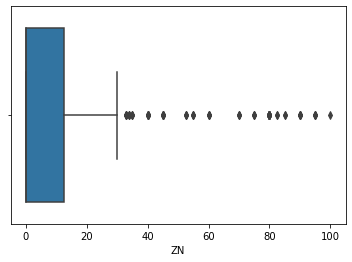

In [12]:
sns.boxplot(data['ZN'])

Такая доля земли под жилую застройку может быть.

#### Строим модель линейной регрессии ####

In [17]:
def get_score(X,y, random_seed=42):
    model = LinearRegression()
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(X_train, Y_train);
    score_train = model.score(X_train, Y_train)    
    score_test = model.score(X_test, Y_test)
    return score_train, score_test

#### Теперь построим модель на первоначальных данных. ####

In [18]:
X_1 = data[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]
Y_1 = data["MEDV"]
s_tr, s_ts = get_score(X_1, Y_1)
print(f"Качество на тренировочных данных: {s_tr}.")
print(f"Качество на тестовых данных: {s_ts}.")

Качество на тренировочных данных: 0.7434997532004697.
Качество на тестовых данных: 0.7112260057484951.


#### Построим Матрицу корреляции ####

<AxesSubplot:>

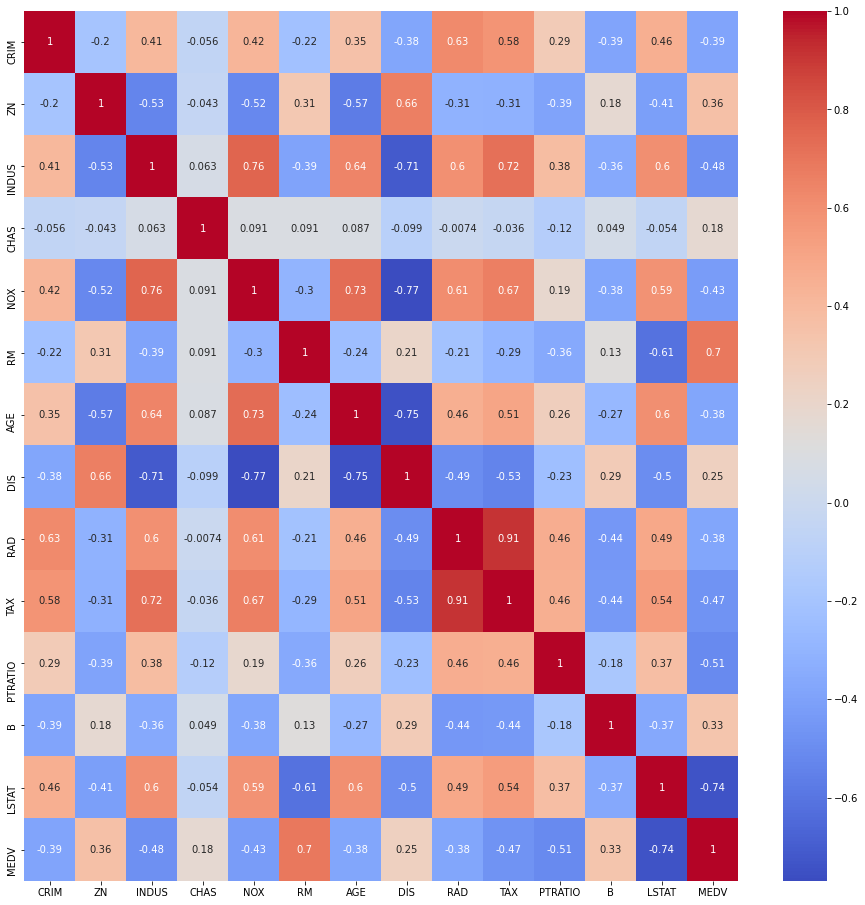

In [26]:
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(), annot = True, cmap= 'coolwarm')

Переменные RAD и TAX имеют высокий коэффициент корреляци.

#### Отбросим по очереди один из сильно скоррелированных параметров, и снова построим модель. ####

In [27]:
X = data[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","TAX","PTRATIO","B","LSTAT"]] # без RAD
Y = data["MEDV"]
s_tr, s_ts = get_score(X, Y)
print(f"Качество на тренировочных данных: {s_tr}.")
print(f"Качество на тестовых данных: {s_ts}.")

Качество на тренировочных данных: 0.7368776364334096.
Качество на тестовых данных: 0.6883010754490912.


In [28]:
X = data[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","PTRATIO","B","LSTAT"]] # без TAX
Y = data["MEDV"]
s_tr, s_ts = get_score(X, Y)
print(f"Качество на тренировочных данных: {s_tr}.")
print(f"Качество на тестовых данных: {s_ts}.")

Качество на тренировочных данных: 0.7408167656753205.
Качество на тестовых данных: 0.6983850039833572.


Можно заметить, что если убрать хоть один из параметров (RAD или TAX) качество модели будет меньше, чем при использовании их вместе.